# 1. Analyze Synchronized freezing

---
## 1-1. Compute %_overlapped_freezing & Cohen_D

**Tasks:**
1. Read CSV files from subholders, and output "summary.csv"
2. Compute %_freezing and %_overlapped_freezing, and output to "summary1.csv"
3. Compute permutation/Cohen_D and store in DF, and output to "summary2.csv"
4. Compute lag times, and output to "summary3.csv"

**Requirements:**
    
Set path to the root folder, which contains multiple experiment folders. Each experiment folder
contains CSV files, which describe freezing onset and offset for two subjects.

**Output sumary2.csv file format:**

|Foldername_videoname|single_animal|fz_start_sub1|fz_end_sub1|fz_start_sub2|fz_end_sub2|fz_sub1|fz_sub2|fz_overlap|cohen_d|lagt_start_s1_s2|lagt_start_s2_s1|lagt_end_s1_s2|lagt_end_s2_s1|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|str|bool|int array|int array|int array|int array|float|float|float|float|int array|int array|int array|int array|

**It would take 2:30.**



In [1]:
#############################################
# Specify the folder
path = r"W:\videos_synchrony"

#path = r"C:\Users\User\Desktop\test"
#############################################
import synchro_freeze as sf
import traceback
import os

DEBUG = False
#DEBUG = True
df = sf.process_freeze(path,DEBUG)

Step1. Reading CSV files from subfolders.
	Processing directory:  20190408_testing_1,  20190408_testing_2,  20190520_test1,  20190520_test2,  20190611_afternoon,  20190611_morning,  20190801_opioid_test_morning,  20190803_testmorning,  20190809_afternoon,  20190809_morning,  20190814,  20190818,  20190820,  20190827,  20190902,  20190917,  20191012,  20191015,  20191016,  20191024,  20191028,  20191109,  20191224,  20200115,  20200218,  20200318,  20200324,  20200328,  20200331,  20200413,  20200420,  20200427,  20200518,  20200606,  20200606-145125,  20200623,  20200630,  20200703,  20200712training,  20200713,  20200716,  20200723,  20200816,  20200829,  20200905,  completed.
	Writing summary.csv.

Step2. Computing %_freezing.
	Writing summary1.csv.

Step3. Computing permutation/Cohen_D and store in DF.
	Processing column:  0/315,  1/315,  2/315,  3/315,  4/315,  5/315,  6/315,  7/315,  8/315,  9/315,  10/315,  11/315,  12/315,  13/315,  14/315,  15/315,  16/315,  17/315,  18/315,  1

---
## 1-2. Display specific experiment
### Resulting figure will be output as overlap_fig.eps

In [2]:
print("We found the following Foldername_videoname.\n")
for i in range (0, len(df)):
    print("\t", i, df.iloc[i,0])

print("\nSelect the Foldername_videoname ID number and run the next cell")

We found the following Foldername_videoname.

	 0 20190408_testing_1_7a
	 1 20190408_testing_1_7b
	 2 20190408_testing_1_9a
	 3 20190408_testing_1_9b
	 4 20190408_testing_1_f10ab
	 5 20190408_testing_1_f11a
	 6 20190408_testing_1_f11b
	 7 20190408_testing_1_f6ab
	 8 20190408_testing_1_f7a
	 9 20190408_testing_1_f7b
	 10 20190408_testing_1_f8ab
	 11 20190408_testing_1_f9a
	 12 20190408_testing_1_f9b
	 13 20190408_testing_1_m10ab
	 14 20190408_testing_1_m6ab
	 15 20190408_testing_1_m8ab
	 16 20190408_testing_2_f10a
	 17 20190408_testing_2_f10b
	 18 20190408_testing_2_f11ab
	 19 20190408_testing_2_f6a
	 20 20190408_testing_2_f6b
	 21 20190408_testing_2_f7ab
	 22 20190408_testing_2_f8a
	 23 20190408_testing_2_f8b
	 24 20190408_testing_2_f9ab
	 25 20190408_testing_2_m10a
	 26 20190408_testing_2_m10b
	 27 20190408_testing_2_m6a
	 28 20190408_testing_2_m6b
	 29 20190408_testing_2_m7ab
	 30 20190408_testing_2_m8a
	 31 20190408_testing_2_m8b
	 32 20190408_testing_2_m9ab
	 33 20190520_test1_f12a

Folder name: 20191016_m40
Animal1 freeze : 57.708333
Animal2 freeze : 34.375000
Overlap freeze : 25.208333


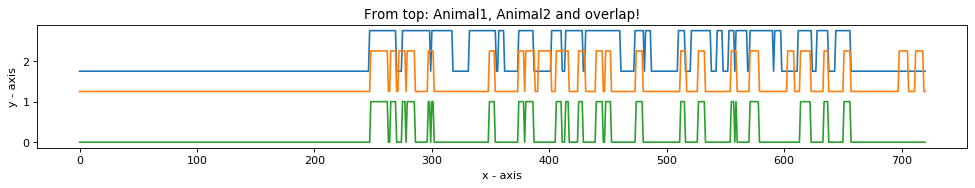

In [3]:
folderID = 150
output = True

(a,b,c,d) = sf.overlap_freezing(df.iloc[folderID,:], path, output)

In [8]:
for i in range (0, len(d)):
    print(i, ",", d[i,2])

0 , 0
1 , 0
2 , 0
3 , 0
4 , 0
5 , 0
6 , 0
7 , 0
8 , 0
9 , 0
10 , 0
11 , 0
12 , 0
13 , 0
14 , 0
15 , 0
16 , 0
17 , 0
18 , 0
19 , 0
20 , 0
21 , 0
22 , 0
23 , 0
24 , 0
25 , 0
26 , 0
27 , 0
28 , 0
29 , 0
30 , 0
31 , 0
32 , 0
33 , 0
34 , 0
35 , 0
36 , 0
37 , 0
38 , 0
39 , 0
40 , 0
41 , 0
42 , 0
43 , 0
44 , 0
45 , 0
46 , 0
47 , 0
48 , 0
49 , 0
50 , 0
51 , 0
52 , 0
53 , 0
54 , 0
55 , 0
56 , 0
57 , 0
58 , 0
59 , 0
60 , 0
61 , 0
62 , 0
63 , 0
64 , 0
65 , 0
66 , 0
67 , 0
68 , 0
69 , 0
70 , 0
71 , 0
72 , 0
73 , 0
74 , 0
75 , 0
76 , 0
77 , 0
78 , 0
79 , 0
80 , 0
81 , 0
82 , 0
83 , 0
84 , 0
85 , 0
86 , 0
87 , 0
88 , 0
89 , 0
90 , 0
91 , 0
92 , 0
93 , 0
94 , 0
95 , 0
96 , 0
97 , 0
98 , 0
99 , 0
100 , 0
101 , 0
102 , 0
103 , 0
104 , 0
105 , 0
106 , 0
107 , 0
108 , 0
109 , 0
110 , 0
111 , 0
112 , 0
113 , 0
114 , 0
115 , 0
116 , 0
117 , 0
118 , 0
119 , 0
120 , 0
121 , 0
122 , 0
123 , 0
124 , 0
125 , 0
126 , 0
127 , 0
128 , 0
129 , 0
130 , 0
131 , 0
132 , 0
133 , 0
134 , 0
135 , 0
136 , 0
137 , 0
138 , 

---
## 1-3. Test the significance of overlapped freezing by permutation
1. Calculate overlapped freezing by permutating relative freezing dynamics between the two animals. <br>
    1K sampling of % overlapped freezing from the permutation will be stored as "test1.csv".
2. One-Sample Wilcoxon Signed Rank Test in R using the "r-codes" notebook.<br>
http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r